In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ju"

In [3]:
runs_df = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [4]:
country_counts = runs_df["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 50]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'GER',
 'DEN',
 'FRA',
 'ESP',
 'CZE',
 'ITA',
 'POL',
 'USA',
 'UKR',
 'HUN']

In [5]:
runs_df["first_name"] = runs_df.name.str.split(" ", expand=True).iloc[:, 0]
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()
display(top_first_names)

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'johan',
 'anders',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'jouko',
 'petteri',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'samuli',
 'niko',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'reijo',
 'daniel',
 'martti',
 'kai',
 'jarno',
 'panu',
 'raimo',
 'stefan',
 'thomas',
 'keijo',
 'magnus',
 'per',
 'simon',
 'pentti',
 'sak

In [6]:
# Temporarily remove 2018 in order to try predict it in other notebook
runs_df = runs_df[runs_df.year != 2018]
runs_df

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
1,joni hirvikallio,2017,16,KOOVEE,FIN,5.762,1,6,joni
2,joni hirvikallio,2016,143,KOOVEE,FIN,6.251,6,6,joni
3,joni hirvikallio,2015,12,KOOVEE,FIN,5.843,5,6,joni
4,joni hirvikallio,2013,37,KOOVEE,FIN,5.796,1,6,joni
6,topi anjala,2017,1,KOOVEE,FIN,5.621,1,7,topi
7,topi anjala,2016,9,KOOVEE,FIN,6.100,1,7,topi
8,topi anjala,2015,12,KOOVEE,FIN,5.977,1,7,topi
9,topi anjala,2014,21,KOOVEE,FIN,7.164,2,7,topi
10,topi anjala,2013,37,KOOVEE,FIN,5.642,7,7,topi
11,topi anjala,2012,48,KOOVEE,FIN,5.974,3,7,topi


In [7]:
ve_data = pd.read_csv(f'data/runs_ve.tsv', delimiter="\t")
ve_data["first_name"] = ve_data.name.str.split(" ", expand=True).iloc[:, 0]
ve_name_counts = ve_data["first_name"].value_counts()

In [41]:
from shared import preprocess_features_ve
features = preprocess_features_ve(runs_df,ve_data, top_countries)
display(features.head(5))
y = np.log(features['pace'].values.ravel())
# drop y and hierarchical group membership from predictor variables
team_numbers = features[['team_id']]
hier_groups = features[['name']]
x_var_names = pd.get_dummies(features.drop(['pace','name', 'team_id'],axis=1), columns=["leg","c"], drop_first=True, sparse=True).columns
x = pd.get_dummies(features.drop(['pace','name', 'team_id'],axis=1), columns=["leg","c"], drop_first=True, sparse=True).values
display(x.shape)
display(y.shape)
display(x_var_names)

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
1,joni hirvikallio,2017,16,KOOVEE,FIN,5.762,1,6,joni
2,joni hirvikallio,2016,143,KOOVEE,FIN,6.251,6,6,joni
3,joni hirvikallio,2015,12,KOOVEE,FIN,5.843,5,6,joni
4,joni hirvikallio,2013,37,KOOVEE,FIN,5.796,1,6,joni
6,topi anjala,2017,1,KOOVEE,FIN,5.621,1,7,topi


,team_id,team_id_log10,c,runs,ve_name,leg,name,pace
1,16,1.204120,FIN,6,0,1,0,5.762
2,143,2.155336,FIN,6,0,6,0,6.251
3,12,1.079181,FIN,6,0,5,0,5.843
4,37,1.568202,FIN,6,0,1,0,5.796
6,1,0.000000,FIN,7,0,1,1,5.621


(64184, 28)

(64184,)

Index(['team_id_log10', 'runs', 've_name', 'leg_2', 'leg_3', 'leg_4', 'leg_5',
       'leg_6', 'leg_7', 'c_DEN', 'c_ESP', 'c_EST', 'c_FIN', 'c_FRA', 'c_GBR',
       'c_GER', 'c_HUN', 'c_ITA', 'c_LAT', 'c_LTU', 'c_NOR', 'c_OTHER',
       'c_POL', 'c_RUS', 'c_SUI', 'c_SWE', 'c_UKR', 'c_USA'],
      dtype='object')

In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 1 to 76530
Data columns (total 8 columns):
team_id          64184 non-null int64
team_id_log10    64184 non-null float64
c                64184 non-null object
runs             64184 non-null int64
ve_name          64184 non-null int64
leg              64184 non-null object
name             64184 non-null int64
pace             64184 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 4.4+ MB


In [43]:
x = x
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(64184, 28)

(64184, 1)

In [44]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(51347, 28)

In [46]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [47]:
x_test[1:5,:]

array([[2.9633155113861114, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2.7528164311882715, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3.2095150145426308, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3.2278867046136734, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Shapes: y_test=(12837, 1) y_pred=(12837,)
Mean squared error: 5.519
Explained variance score: 0.371


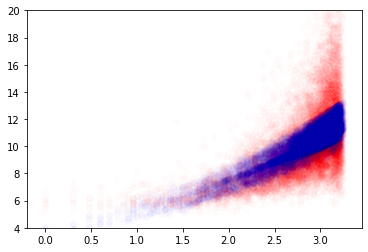

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[ 0.32453257 -0.01000578  0.00141114  0.05003053  0.04941565  0.12368519
  0.15090001  0.10088088  0.03327535  0.14379865  0.17721851  0.22013498
  0.29781823  0.16746028  0.24168055  0.25049605  0.14292191  0.15685711
  0.21436857  0.11919886  0.18874091  0.25916999  0.15234549  0.1779145
  0.1464353   0.18313487  0.12817863  0.11842228]


In [48]:
#%%time
linear = linear_model.LinearRegression()
print(linear)
fit_and_test_model(linear, x_train, x_test, y_train, y_test)
print(linear)
print((linear.coef_))

In [49]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

ValueError: arrays must all be same length

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=7100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=1, warm_start=False)
      Iter       Train Loss   Remaining Time 
         1           0.0626            5.76m
         2           0.0581            5.21m
         3           0.0545            4.84m
         4           0.0514            4.76m
         5           0.0489            5.08m
         6           0.0468            5.12m
         7           0.0451            5.

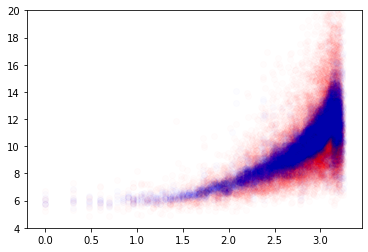

feature_importances_: [7.93289031e-01 3.72735952e-02 6.13008829e-03 2.34404506e-03
 3.22411941e-03 2.48105342e-02 3.64724248e-02 1.39660955e-02
 5.48366771e-03 8.14674602e-04 2.04765302e-04 7.80689679e-04
 5.03555064e-02 6.72193053e-04 2.18134812e-03 1.28077321e-03
 1.68540861e-04 1.49649828e-04 1.17403373e-03 7.44745026e-04
 2.16969835e-03 8.17336469e-03 3.82267336e-04 1.04376172e-03
 9.48933551e-04 5.48309100e-03 8.77263625e-05 1.90636266e-04]


['gbr.sav']

In [50]:
#%%time
gbr_num_estimators=7100
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)
print(gbr)
fit_and_test_model(gbr, x_train, x_test, y_train, y_test)
print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))
joblib.dump(gbr, 'gbr.sav')

In [51]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=7100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=1, warm_start=False)


In [52]:
gbr_num_estimators=7100
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0567            2.58m
         2           0.0543            2.49m
         3           0.0522            2.60m
         4           0.0504            2.71m
         5           0.0490            2.69m
         6           0.0477            2.69m
         7           0.0466            2.65m
         8           0.0457            2.66m
         9           0.0449            2.68m
        10           0.0443            2.69m
        20           0.0413            2.49m
        30           0.0405            2.46m
        40           0.0401            2.39m
        50           0.0399            2.33m
        60           0.0398            2.27m
        70           0.0397            2.22m
        80           0.0397            2.16m
        90           0.0396            2.11m
       100           0.0396            2.08m
       200           0.0393            1.86m
       300           0.0391            1.72m
       40

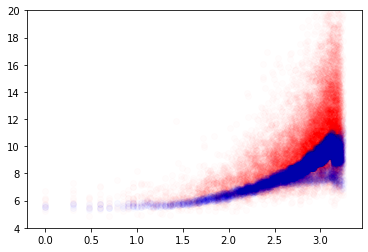

['gbr_q_low.sav']

In [53]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)
joblib.dump(gbr_q_low, 'gbr_q_low.sav')

      Iter       Train Loss   Remaining Time 
         1           0.0642            3.38m
         2           0.0622            3.20m
         3           0.0604            3.18m
         4           0.0589            3.21m
         5           0.0576            3.28m
         6           0.0564            3.28m
         7           0.0554            3.34m
         8           0.0545            3.34m
         9           0.0538            3.34m
        10           0.0531            3.32m
        20           0.0493            3.01m
        30           0.0480            2.81m
        40           0.0474            2.67m
        50           0.0471            2.58m
        60           0.0469            2.49m
        70           0.0468            2.43m
        80           0.0466            2.38m
        90           0.0466            2.34m
       100           0.0465            2.30m
       200           0.0461            2.10m
       300           0.0458            2.04m
       40

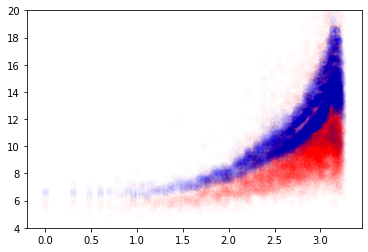

['gbr_q_high.sav']

In [54]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)
joblib.dump(gbr_q_high, 'gbr_q_high.sav')

In [ ]:
joblib.dump(gbr, 'gbr.sav')
joblib.dump(gbr_q_low, 'gbr_q_low.sav')
joblib.dump(gbr_q_high, 'gbr_q_high.sav')


In [ ]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [ ]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)

# Intentionally don't use log scale for calculation to get bigger std 
gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_q_pred_errors.q_low_error.mean())
display(gbr_q_pred_errors.q_high_error.mean())
display(gbr_q_pred_errors.q_error.mean())
display(gbr_q_pred_errors["std"].mean())
display(gbr_q_pred_errors["std_correct"].mean())
display(gbr_q_pred_errors["abs_error_in_stds"].mean())

In [ ]:
np.exp(1.138)

In [ ]:
%%date

In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])